<a href="https://colab.research.google.com/github/Manojpatil123/Capstone-project-Supervised_machinelearning-on-Appliance-Energy-Prediction/blob/main/Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).

### Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

#GOAL of the project
Today's word usage of energy is increasing rapidly. Due to more usage of energy in some parts of the world, we are facing a lack of energy and it leads to environmental pollution. In some of the places, we are facing outrageous energy consumption in home appliances, so our main goal in this project is to analyse what the factors are affecting the increasing energy consumption of home appliances, how we can reduce the energy consumption of home appliances, and predict energy consumption of appliances by using regression models.

# Tabel of content 


* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Exploratory Data Analysis__
    
* __Step 4: Feature selection__
   
* __Step 5: Feature engineering__
   
* __Step 6: Train and Test split__
   
* __Step 7: Model training__
   
* __Step 8: Cross validation__

* __Step 9: Model explainability__

* __Step 10: Conclusion__


In [1]:
#installing package
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 7.2 MB/s 


# Importing the Relevant Libraries

In [120]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

Loding dataset to pandas dataframe

In [135]:
#importing dataset
path='/content/drive/MyDrive/Alma better/Alma better/capstone project/supervised learning (regression)/data_application_energy.csv'
df=pd.read_csv(path)

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Checking shape of dataset
 Here 1st value counts number of data points and second value represents the number of features in the dataset



In [5]:
#checking shape of the dataset
df.shape

(19735, 29)

in our dataset 29 columns and 19735 rows are present

## Data set information

date time year-month-day hour:minute:second 

Appliances, energy use in Wh (Dependent variable) 

lights, energy use of light fixtures in the house in Wh (Drop this column) 

T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in % 

T2, Temperature in living room area, in Celsius 

RH2, Humidity in living room area, in % 

T3, Temperature in laundry room area 

RH3, Humidity in laundry room area, in % 

T4, Temperature in office room, in Celsius

RH4, Humidity in office room, in % 

T5, Temperature in bathroom, in Celsius 

RH5, Humidity in bathroom, in % 

T6, Temperature outside the building (north side), in Celsius 

RH6, Humidity outside the building (north side), in % 

T7, Temperature in ironing room , in Celsius 

RH7, Humidity in ironing room, in % 

T8, Temperature in teenager room 2, in Celsius 

RH8, Humidity in teenager room 2, in % 

T9, Temperature in parents room, in Celsius 

RH9, Humidity in parents room, in % 

To, Temperature outside (from Chievres weather station), in Celsius 

Pressure (from Chievres weather station), in mm Hg 

RHout, Humidity outside (from Chievres weather station), in % 

Wind speed (from Chievres weather station), in m/s 

Visibility (from Chievres weather station), in km 

Tdewpoint (from Chievres weather station), Â°C 

rv1, Random variable 1, nondimensional 

 rv2, Random variable 2, nondimensional



# Data Inspection

### Checking all the data types of our dataset holds.

In [6]:
#checking dtypes of data
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

here except data column remaining column are numerical feature

### Display the complete summary of the dataset
df.info() gives the summary of the dataframe including data types, shape and memory storage.

In [7]:
#checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### Checking columns in our dataset 

In [8]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### Checking statistics part of our data i.e. mean,standard deviation, and so on
to know more about the characteristics of the dataset We are using the df.describe() which by default gives statistical information of all numerical features in our data frame.

In [9]:
#checking statistical info of data
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### from the statistics part of our data we can observe

*   Max energy usage of appliance is 1080 and min is 10 watt
*   light column having majority of the data 0 values
*   Max pressure outside house is 772.3 mm_hg
*   Max wind speed is 14 m/s

## Categorical features statistics details

With the help of include argument we can mention categorical columns, it will show summary of all the categorical features too.

In [10]:
df.describe(include=['O'])

,date
count,19735
unique,19735
top,2016-01-11 17:00:00
freq,1


# Exploratory Data Analysis

### checking distribution of target variable

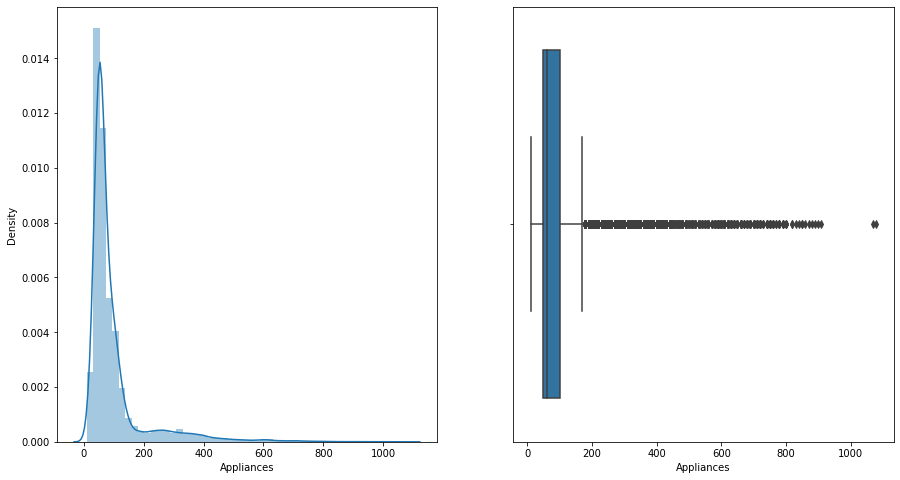

In [11]:
fig,ax=plt.subplots(1,2, figsize=(15,8))
sns.distplot(df.Appliances,ax=ax[0])
sns.boxplot(df.Appliances, ax=ax[1])

dependent variable is right skewed and lot of outliers present inour data set

using transformation method on dependent variable

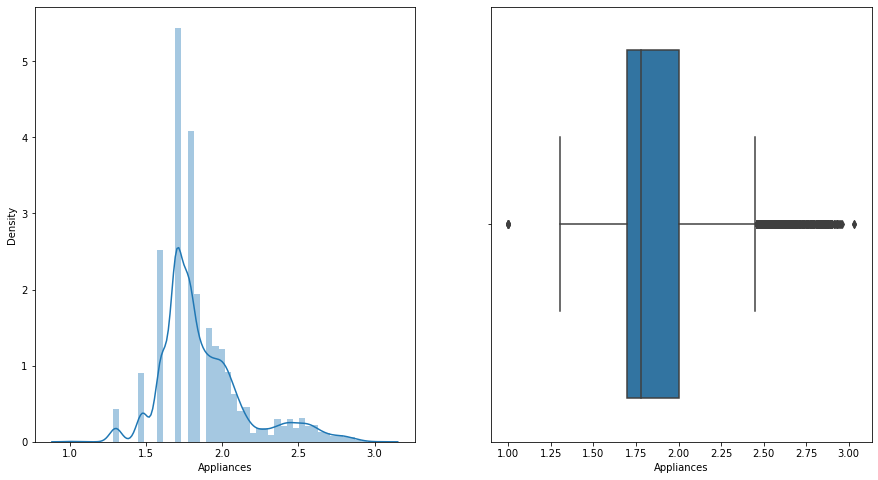

In [12]:
fig,ax=plt.subplots(1,2, figsize=(15,8))
sns.distplot(np.log10(df.Appliances),ax=ax[0])
sns.boxplot(np.log10(df.Appliances), ax=ax[1])

 log10 transformation give almost normnal distribution after converting two normal distribution 

### ckecking distribution of all the features

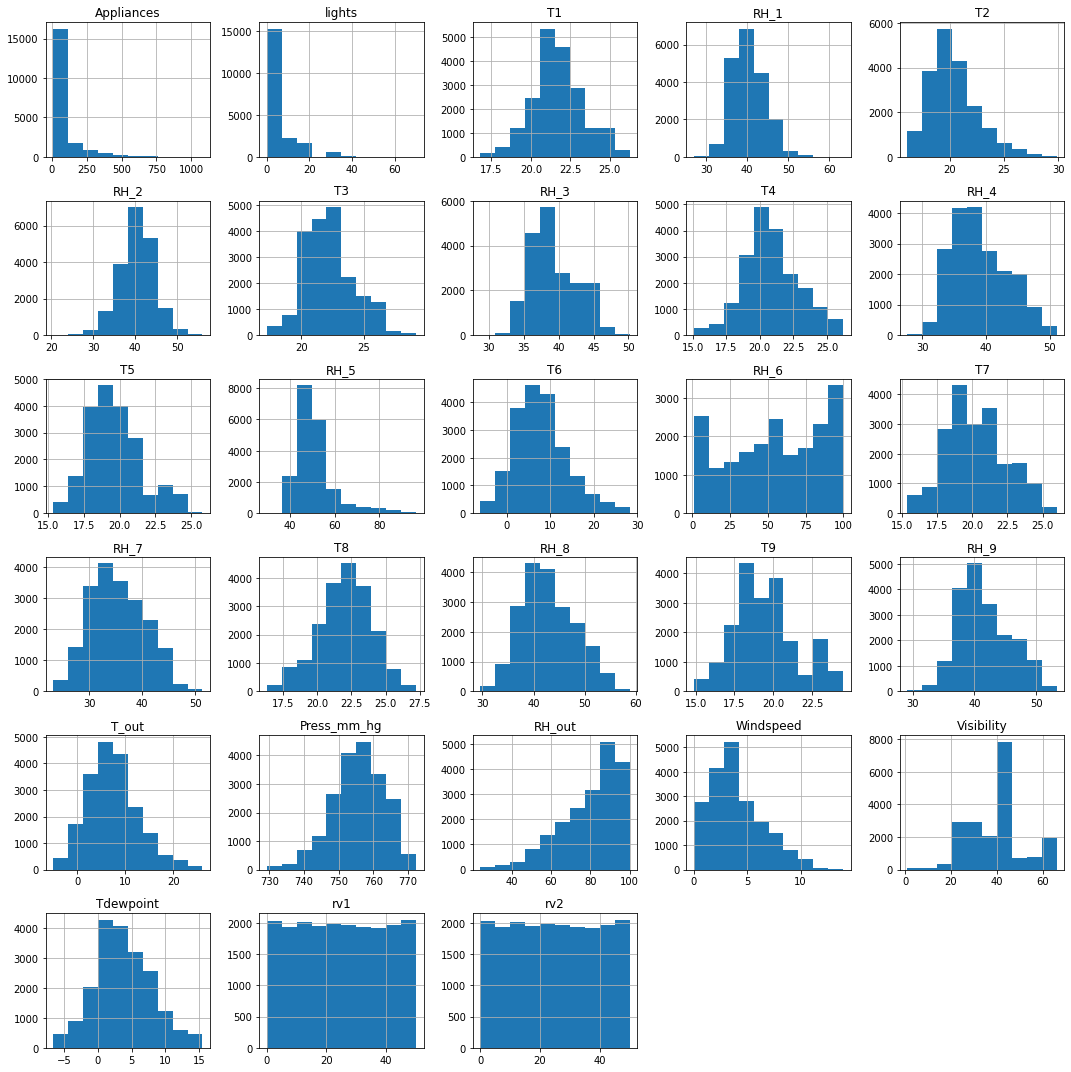

In [13]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(data=df,ax=ax)
plt.tight_layout()

except lights, RH6 ,RH _out. windspeed, rv1, rv2column all the remaining columns are normal distributed data.

### checking relation between all the variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa46dbb1e10>,
      dtype=object)

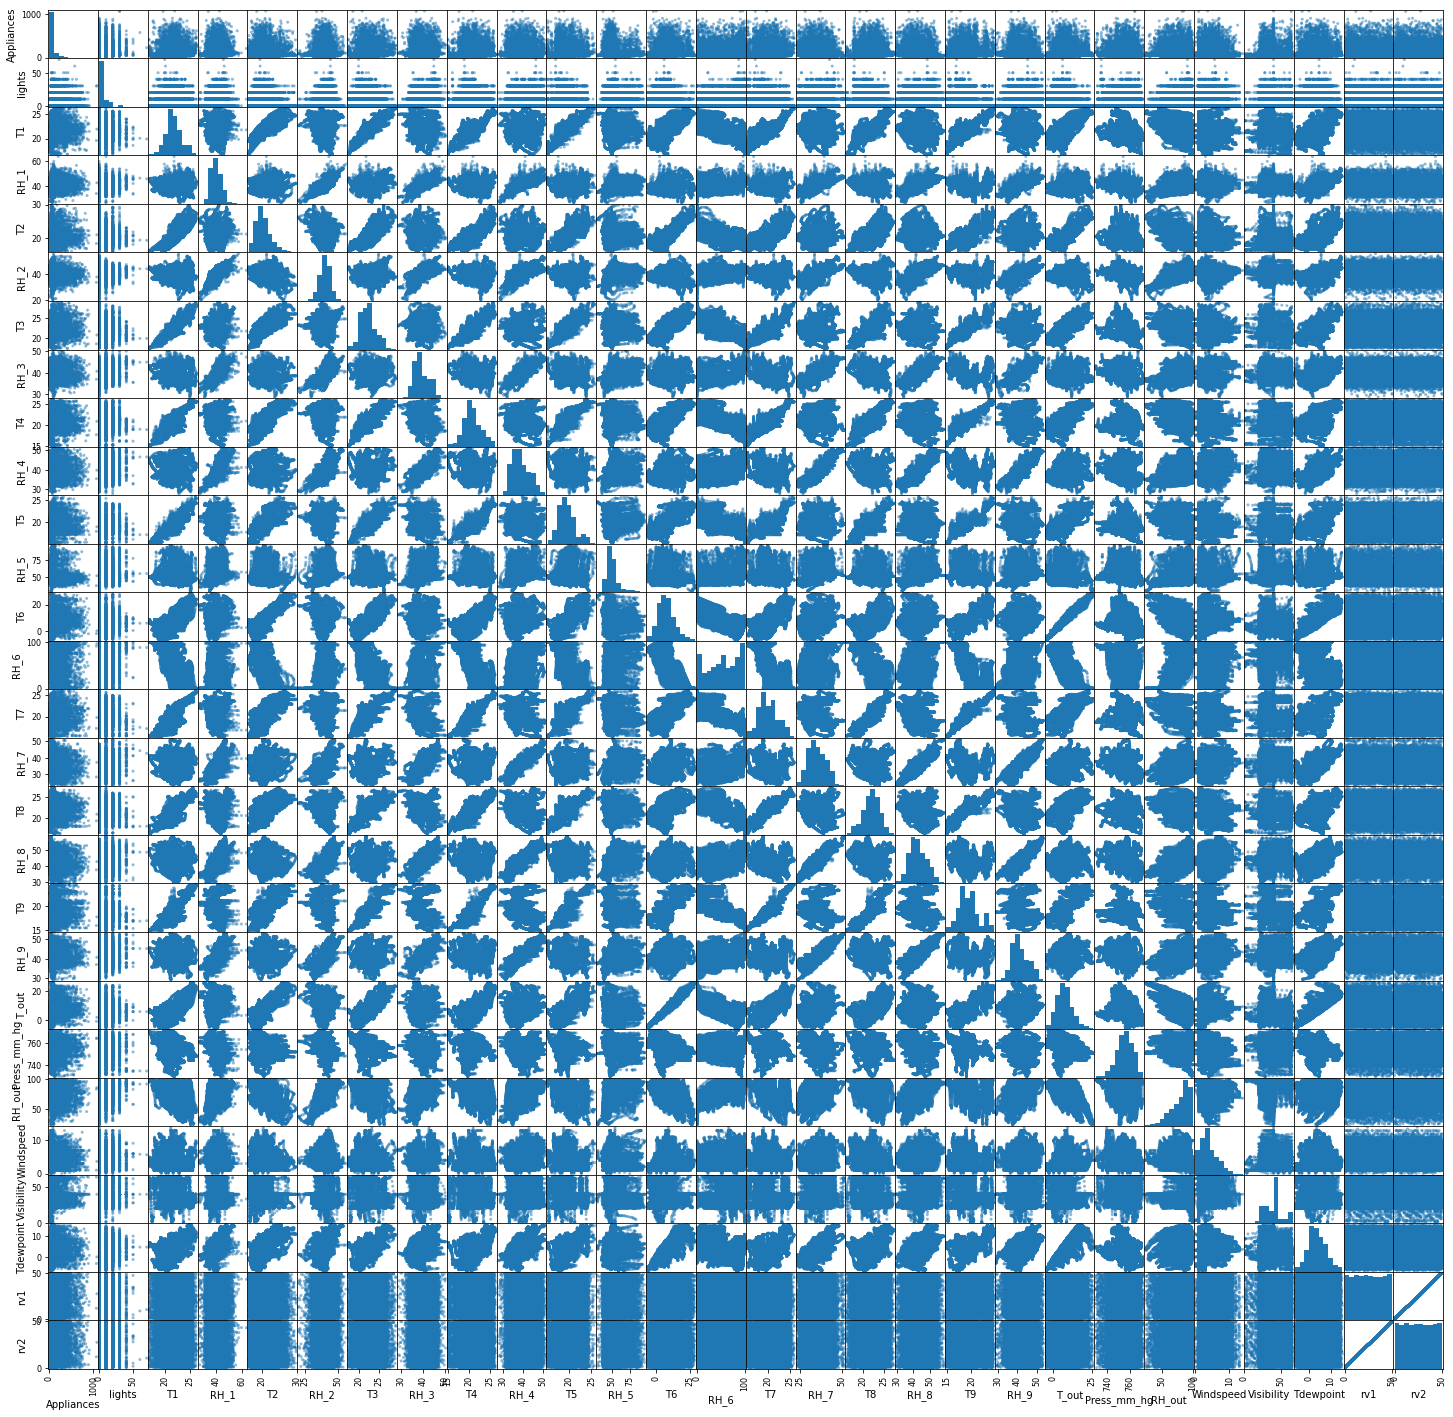

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(25,25))

except lights feature all the remaining feature linearly corelate, we need to remove lights feature

### converting dates columns to numerical

In [136]:
#extracting date month time from date time columns
df["dates"]=pd.to_datetime(df['date'])
df['months']=df["dates"].dt.month
df['hour']=df["dates"].dt.hour

## energy consumption vs date 




In [16]:
date=df.groupby(df.months)["Appliances"].sum().sort_values(ascending=False)
date

months
3    432800
4    427200
2    421550
5    362950
1    283510
Name: Appliances, dtype: int64

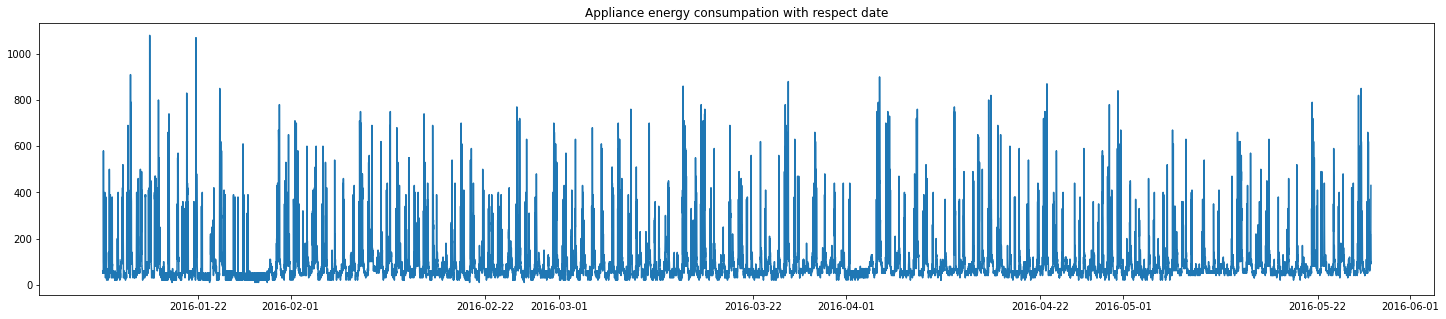

In [17]:
#ploting graph between appliance and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates, df.Appliances)
plt.title("Appliance energy consumpation with respect date")
plt.show()

in the march month we can clearly say that appliance consuming more energy, in jan month appliance consuming less energy

## energy consumption vs pressure

In [18]:
pressure=df.groupby(df.months)["Press_mm_hg"].sum().sort_values(ascending=False)
pressure

months
3    3374073.85
4    3259899.30
2    3146144.25
5    2912476.65
1    2217644.50
Name: Press_mm_hg, dtype: float64

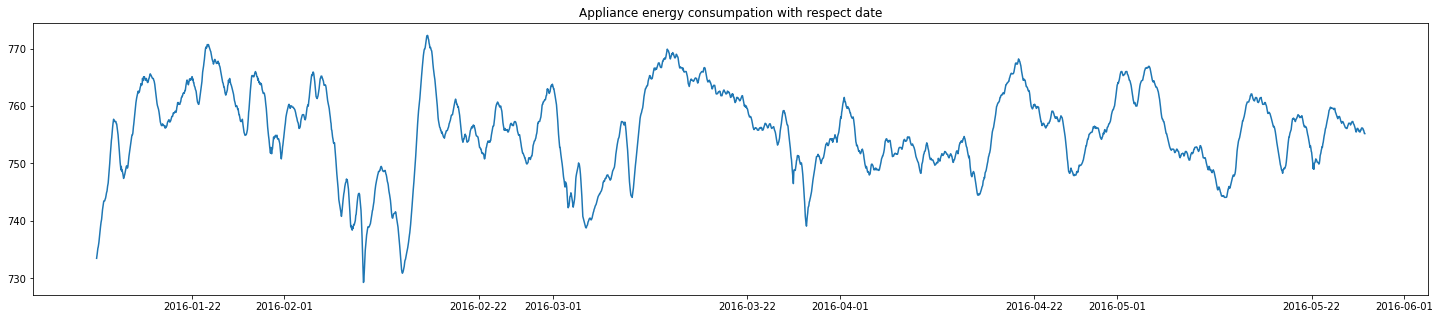

In [19]:
#ploting graph between pressure and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates, df.Press_mm_hg)
plt.title("Appliance energy consumpation with respect date")
plt.show()

march month having high pressure is recording and jan month having lesser pressure recording we can clearly say pressure is more impacting on enrgy consumption whenever the high pressure which leads to appliance consume more energy

## energy consumption vs windspeed

In [20]:
Windspeed=df.groupby(df.months)["Windspeed"].sum().sort_values(ascending=False)
Windspeed

months
2    20244.5
3    17824.0
4    15778.5
1    14012.5
5    11865.0
Name: Windspeed, dtype: float64

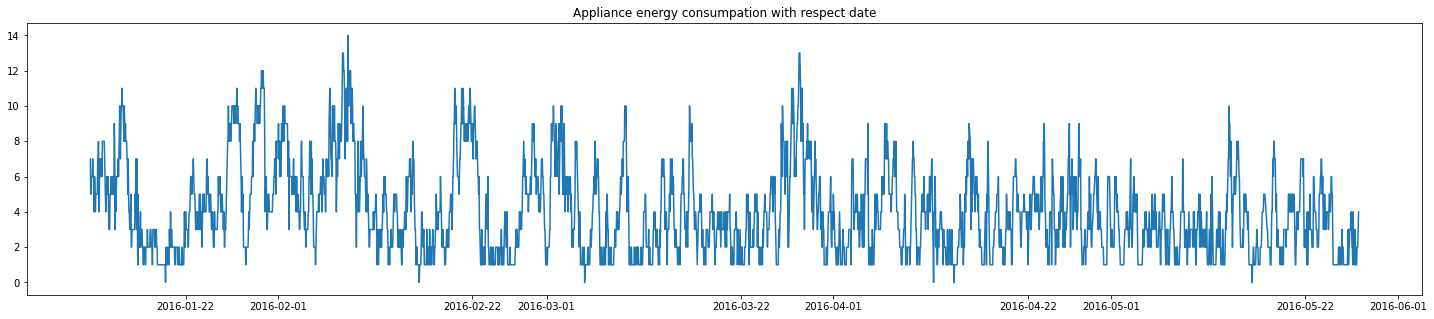

In [21]:
#ploting graph between windspeed and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates, df.Windspeed)
plt.title("Appliance energy consumpation with respect date")
plt.show()

in feb month we wind speed are high but energy consumption is not high on feb month so we can conclude windspeed is not much effective for our target variable

### Checking which day of week has more energy consumption

In [137]:
#extractingf week day 
df['week_days']=df["dates"].dt.dayofweek


In [23]:
Week=df.groupby(df.week_days)["Appliances"].sum().sort_values(ascending=False)
Week

week_days
0    309610
4    297650
5    290690
3    260450
6    259690
2    259000
1    250920
Name: Appliances, dtype: int64

Text(0.5, 1.0, 'energy usage in each days')

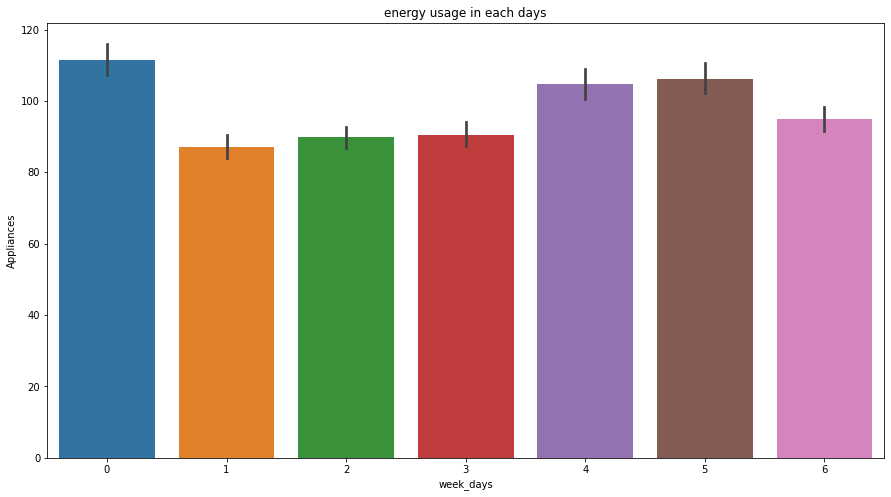

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(df.week_days,df.Appliances)
plt.title("energy usage in each days")

0 - sunday , sunday has more energy consumption it means that people spend more time inside home

### Comparing target variable with all the Humidity columns

In [124]:
humidity_column=df[['RH_1', 'RH_2','RH_3','RH_4','RH_5', 'RH_6','RH_7','RH_8','RH_9']]

In [26]:
#ploting lineplot for all the humidity columns
def line_plot(features):
# figure size
 plt.figure(figsize=(15,8))
 for i in features:
  sns.lineplot(df.Appliances,humidity_column[i], label = i)
 
  plt.title('Appliance energy consumption vs all the Humidity inside house')
plt.show()

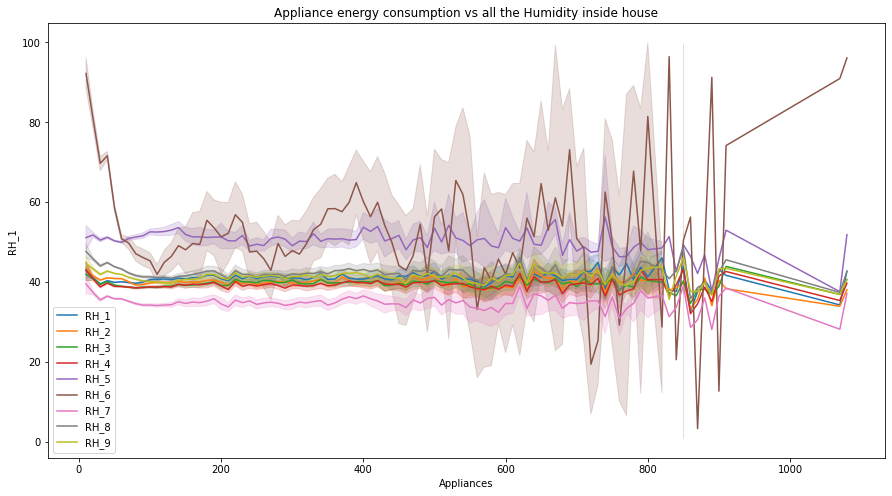

In [27]:
features=humidity_column.columns
line_plot(features)

RH_6 Humidity feature is outside humidity of house it has high variation in the values mostly becouse of outside pressure, temp 

### Comparing target variable with all the temp columns

In [28]:
temp_column=df[['T1', 'T2','T3','T4','T5', 'T6', 'T7',  'T8','T9']]

In [29]:
#ploting lineplot for all the temp columns
def line_plot(features):
# figure size
 plt.figure(figsize=(15,8))
 for i in features:
  sns.lineplot(df.Appliances,temp_column[i], label = i)
 
  plt.title('Appliance energy consumption vs all the temp inside house')
plt.show()

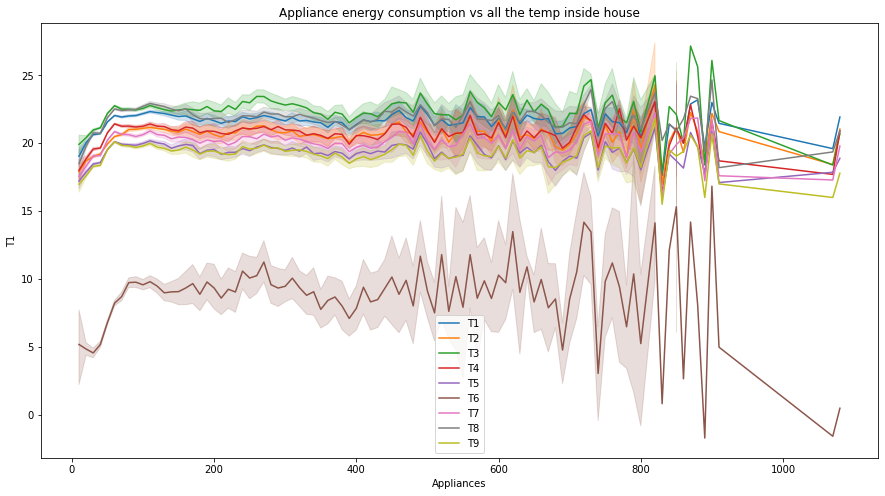

In [30]:
features=temp_column.columns
line_plot(features)

excpet t6 temp all the house inside temp are almost constant in each day but outside temp is having so much variation maybe becouse of pressure, wind speed variation

### Comparing target variable with features calculated by weather station

In [31]:
weather_station_column=df[['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint' ]]

In [32]:
#ploting lineplot for all the weather station columns
def line_plot(features):
# figure size
 plt.figure(figsize=(15,8))
 for i in features:
  sns.lineplot(df.Appliances,weather_station_column[i], label = i)
 
  plt.title('Appliance energy consumption vs all the values detect through weather station')
plt.show()

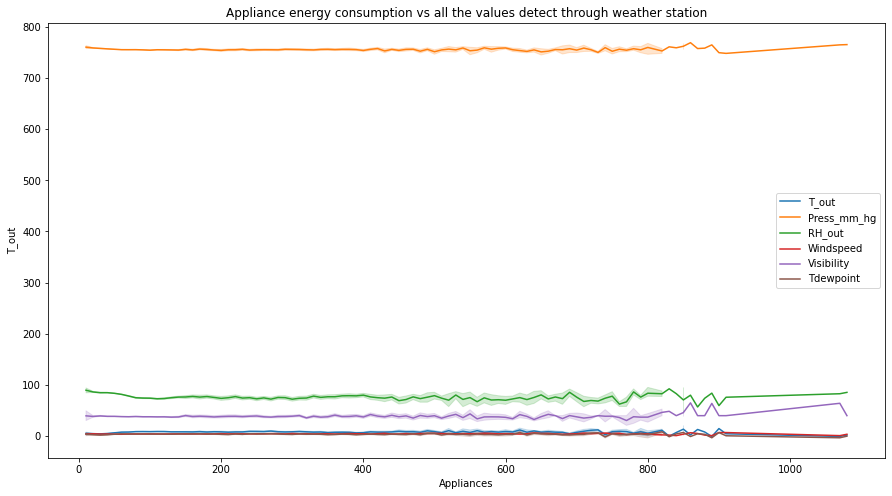

In [33]:
features=weather_station_column.columns
line_plot(features)

all the features having constant values during each day

Checking hour vs power consume

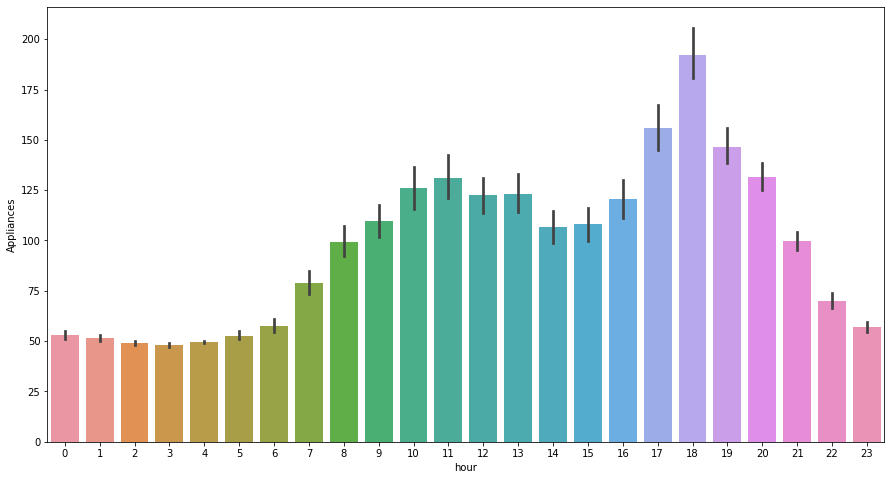

In [70]:
plt.figure(figsize=(15,8))
sns.barplot(df.hour,df.Appliances)

time interval between 16 to 20 have high energy consumption

# Feature selection

In [35]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dates,months,hour,week_days
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00,1,17,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00,1,17,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00,1,17,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00,1,17,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00,1,17,0


In [138]:
#removing dates column
df.drop("dates",axis=1,inplace=True)

In [139]:
#removing dates column
df.drop("date",axis=1,inplace=True)

In [140]:
df.shape

(19735, 31)

In [141]:
#removing light column
df.drop("lights",axis=1,inplace=True)

### varience threshold removal
using this method we can able to all the columns that have constant values in feature

In [40]:
from sklearn.feature_selection import VarianceThreshold

In [41]:
#implemention variancethreshold
variance_threshold=VarianceThreshold(threshold=0)
variance_threshold.fit(df)
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

here there is no column in our data set having constant values 

### Feature selection for numerical features using f_regression.

In [42]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [142]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [143]:
#finding the f scores of each features
f_scores = f_regression(X, Y)
f_scores

(array([6.08546649e+01, 1.47140998e+02, 2.88664211e+02, 7.24083194e+01,
        1.43812455e+02, 2.60243942e+01, 3.20699643e+01, 5.68130299e+00,
        7.70780063e+00, 9.54444046e-01, 2.76909655e+02, 1.37474160e+02,
        1.31448883e+01, 6.12846635e+01, 3.09491920e+01, 1.76061071e+02,
        1.97755919e+00, 5.23984346e+01, 1.95934202e+02, 2.40433596e+01,
        4.68470558e+02, 1.50924181e+02, 1.04712660e-03, 4.65245939e+00,
        2.45132436e+00, 2.45132436e+00, 2.65830480e+00, 9.73160402e+02,
        1.84831825e-01]),
 array([6.44916930e-015, 9.63943146e-034, 2.78494653e-064, 1.87302217e-017,
        5.08641648e-033, 3.40254021e-007, 1.50788109e-008, 1.71560296e-002,
        5.50345129e-003, 3.28602654e-001, 9.33386716e-062, 1.20948068e-031,
        2.89030224e-004, 5.18729570e-015, 2.68310259e-008, 5.21156624e-040,
        1.59663524e-001, 4.69710927e-013, 2.62485380e-044, 9.49392222e-007,
        1.07751629e-102, 1.45647106e-034, 9.74185818e-001, 3.10211263e-002,
        1.1744

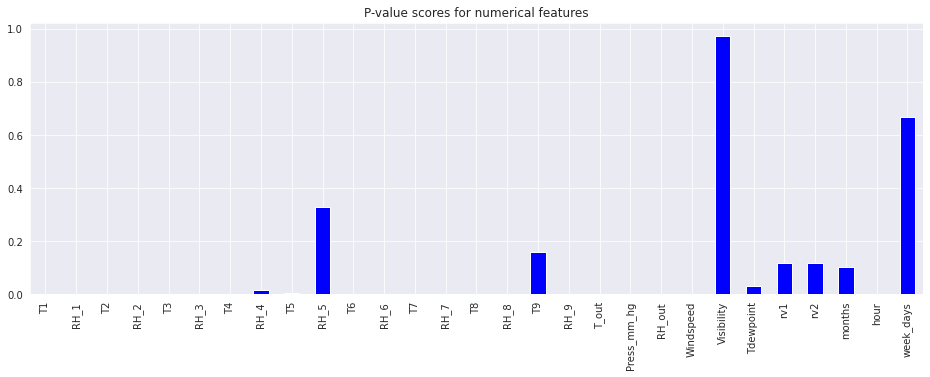

In [144]:
#The second array consists of p-values that we need.
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

drop the T9,RH_4,RH_5,months,Tdewpoint,Visibility,rv1,rv2 and week_days columns we need to remove

In [145]:
#droping 7 columns
df.drop(['T9','RH_5','months','Visibility','rv1',"rv2","week_days"],axis=1,inplace=True)

In [146]:
df.shape

(19735, 23)

### Correlation feature selection

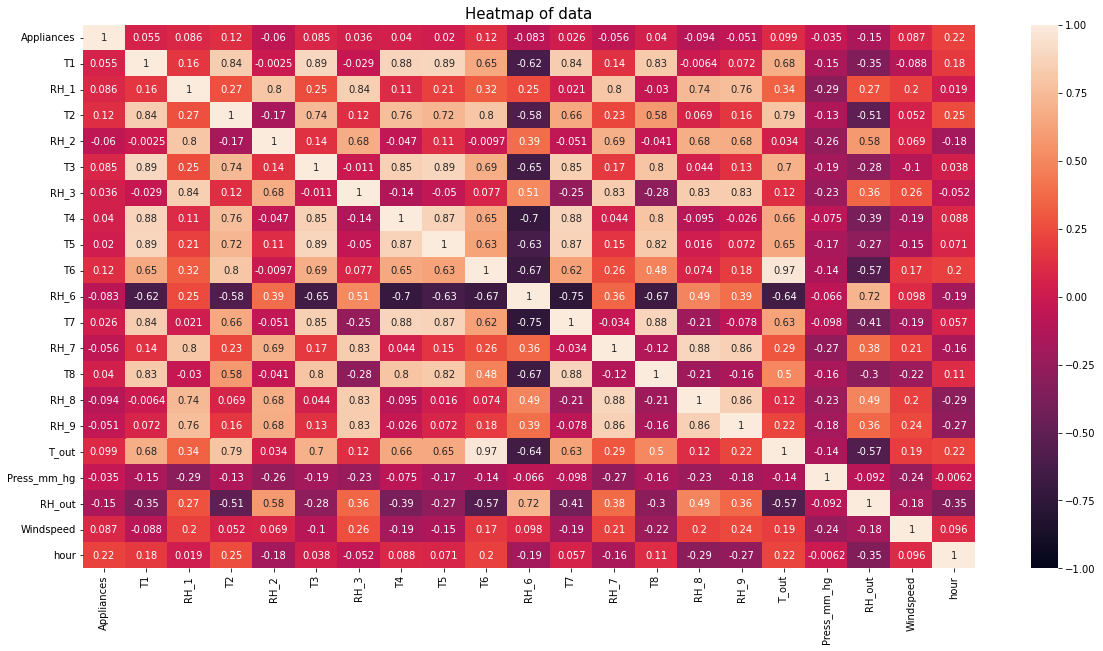

In [48]:
#checking correlation with all columns using heat map
corrmat = df.corr()
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(corrmat, vmin=-1,annot = True)
plt.title("Heatmap of data",fontsize= 15)
plt.show()

from heat map we can abserve there are Multicollinearity present

some columns have less correlation with dependent variable we need 





Checking Multicollinearity 

In [50]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [51]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances']]]).sort_values(by='VIF',ascending=False)

,variables,VIF
0,T1,3226.037802
2,T2,1953.012342
3,RH_2,1894.135134
1,RH_1,1651.340872
5,RH_3,1443.210024
4,T3,1143.503065
9,T7,1130.757906
11,T8,955.537574
7,T5,951.317078
6,T4,799.535203


in  our data set have more Multicollinearity features present but we are not removing them 

# Feature engineering

Checking duplicate values

In [52]:
len(df[df.duplicated()])

0

no duplicates are there in our data set

### checking null values

In [53]:
#Checking null values
df.isnull().sum()

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
T5             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
hour           0
dtype: int64

### checking outliers

In [147]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Appliances     2138
T1              515
RH_1            146
T2              546
RH_2            235
T3              217
RH_3             15
T4              186
RH_4              0
T5              179
T6              515
RH_6              0
T7                2
RH_7             42
T8               71
RH_8             17
RH_9             21
T_out           436
Press_mm_hg     219
RH_out          239
Windspeed       214
Tdewpoint        10
hour              0
dtype: int64

majority of columns have outliers we need to remove them

In [148]:
 #Replacing outliers 
for i  in df.columns:
  if(i!='Appliances'):
   Q1 = df[i].quantile(0.25)
   Q3 = df[i].quantile(0.75)
   IQR = Q3 - Q1

   df=df[(df[i]<(Q3 + 1.5 * IQR))]
   df=df[(df[i]>(Q1 - 1.5 * IQR))] 

In [149]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Appliances     1747
T1              148
RH_1             38
T2              125
RH_2             60
T3               73
RH_3             52
T4               35
RH_4             32
T5               30
T6                4
RH_6              0
T7                0
RH_7              4
T8                0
RH_8             15
RH_9              4
T_out             0
Press_mm_hg      25
RH_out            4
Windspeed        49
Tdewpoint         0
hour              0
dtype: int64

majority of outliers are removed

In [59]:
df.shape

(17014, 20)

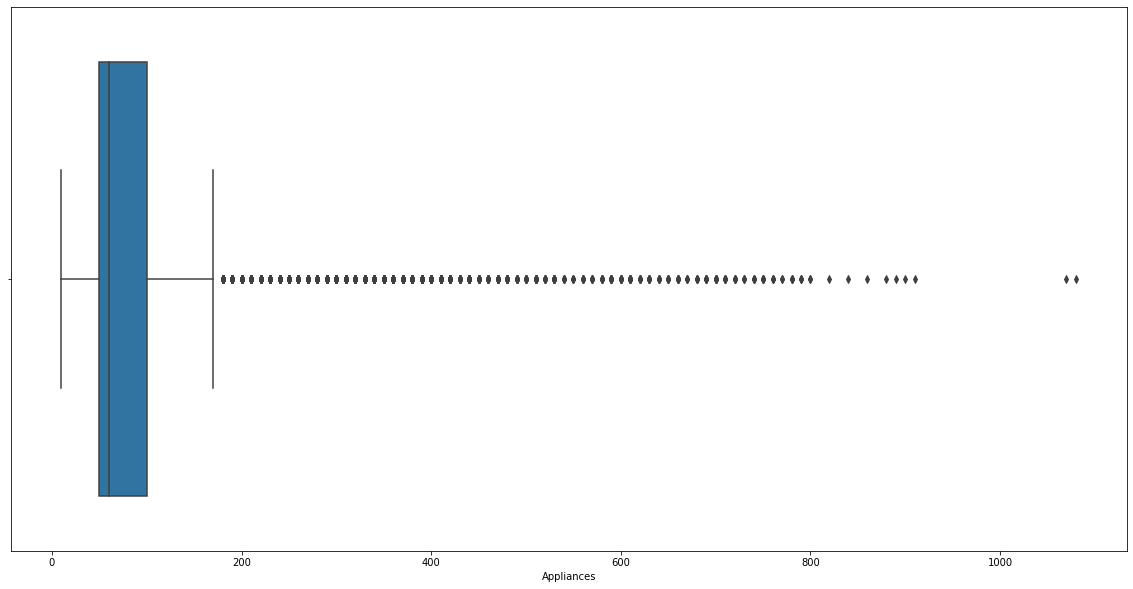

In [60]:
sns.boxplot(df.Appliances)

# test and train split

In [151]:
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,hour
31,400,21.533333,44.966667,20.790000,44.360000,20.426667,45.933333,19.600000,47.500000,19.033333,...,43.223333,19.356667,49.030000,44.530000,5.65,735.883333,87.833333,6.166667,3.716667,22
32,400,21.600000,44.766667,20.890000,44.223333,20.500000,45.933333,19.696667,47.626667,19.100000,...,43.030000,19.390000,48.863333,44.590000,5.70,735.966667,87.666667,6.333333,3.733333,22
33,390,21.600000,44.560000,20.963333,43.963333,20.500000,45.790000,20.096667,47.566667,19.158333,...,42.760000,19.390000,48.863333,44.522500,5.75,736.050000,87.500000,6.500000,3.750000,22
34,240,21.600000,44.360000,21.000000,43.833333,20.500000,45.730000,20.596667,47.223333,19.200000,...,42.626667,19.340000,48.950000,44.433333,5.80,736.133333,87.333333,6.666667,3.766667,22
35,60,21.600000,44.200000,21.000000,43.700000,20.500000,45.590000,20.996667,47.030000,19.222500,...,42.626667,19.290000,49.230000,44.500000,5.85,736.216667,87.166667,6.833333,3.783333,22


In [150]:
df.shape

(16914, 23)

In [152]:
Y=df['Appliances']

In [153]:
X=df.iloc[:,1:]

after removing outliers its almost normally distributed 

In [154]:
#spliting train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,Y, test_size = 0.2, random_state = 10) 
print(X_train.shape)
print(X_test.shape)

(13531, 22)
(3383, 22)


using minmax scaler for scaling down data

In [155]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Fitting the multiple models

In [156]:
# try ploynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3,include_bias=True )
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [157]:
#implementing ridge regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
ridge  = Ridge(alpha=0.001 , max_iter= 3000)


In [158]:
reg = LinearRegression()
lasso  = Lasso()
ridge = Ridge()
tree1 = DecisionTreeRegressor(random_state=10)
regressor = RandomForestRegressor(random_state=10)
gdb = GradientBoostingRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)
lgbm = LGBMRegressor(random_state=10)


In [159]:
#Defining all these models
models = [
           ['LinearRegression: ',LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['PolynomialRegression: ', Ridge()],
           ['DecisionTreeRegressor: ',  DecisionTreeRegressor()],
           ['RandomForestRegressor: ',RandomForestRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', XGBRegressor()],
           ['LGBMRegressor: ', LGBMRegressor()]          
        ]

In [160]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
      curr_model.fit(X_train,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_train))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
      model_data.append(curr_model_data)
    else:
      curr_model.fit(X_poly,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_poly))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_poly_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_poly_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_poly_test)))
      model_data.append(curr_model_data)

[17:59:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [161]:
metrics_df1 = pd.DataFrame(model_data)
metrics_df1

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegression:,52.749976,50.880836,0.143875,0.154999,94.313859,89.214583
1,Lasso:,52.764613,50.926607,0.124754,0.135137,95.361249,90.256959
2,Ridge:,52.746624,50.877307,0.143875,0.154993,94.313886,89.214862
3,PolynomialRegression:,36.252921,41.060078,0.633142,0.465877,61.738504,70.929650
4,DecisionTreeRegressor:,0.000000,34.303872,1.000000,0.280403,0.000000,82.328836
5,RandomForestRegressor:,11.283105,28.146763,0.942513,0.617617,24.439486,60.014546
6,GradientBoostingRegressor:,43.704388,42.981735,0.353093,0.322718,81.983783,79.871527
7,XGBRegressor:,44.060622,43.355346,0.339581,0.317860,82.835538,80.157450
8,LGBMRegressor:,29.922111,35.000159,0.681291,0.491082,57.544510,69.235851


# Croos validation and hyperparameter tuning

In [162]:
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt.space import Real, Categorical, Integer

### Lasso

In [77]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=lasso,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................alpha=0.12574192509310503; total time=   0.0s
[CV] END ..........................alpha=0.12574192509310503; total time=   0.1s
[CV] END ..........................alpha=0.12574192509310503; total time=   0.1s
[CV] END ..........................alpha=0.12574192509310503; total time=   0.1s
[CV] END ..........................alpha=0.12574192509310503; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...........................alpha=0.5417584053807861; total time=   0.1s
[CV] END ...........................alpha=0.5417584053807861; total time=   0.1s
[CV] END ...........................alpha=0.5417584053807861; total time=   0.1s
[CV] END ...........................alpha=0.5417584053807861; total time=   0.1s
[CV] END ...........................alpha=0.5417584053807861; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Lasso(), n_iter=10, scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [78]:
lr_bayes.best_estimator_

Lasso(alpha=0.12574192509310503)

In [79]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.13791730625662013
Test R2 score :  0.13832340689033418


### Ridge

In [80]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=ridge,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........................alpha=0.0038861907195707054; total time=   0.0s
[CV] END ........................alpha=0.0038861907195707054; total time=   0.0s
[CV] END ........................alpha=0.0038861907195707054; total time=   0.0s
[CV] END ........................alpha=0.0038861907195707054; total time=   0.0s
[CV] END ........................alpha=0.0038861907195707054; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........................alpha=0.0009124079317235915; total time=   0.0s
[CV] END ........................alpha=0.0009124079317235915; total time=   0.0s
[CV] END ........................alpha=0.0009124079317235915; total time=   0.0s
[CV] END ........................alpha=0.0009124079317235915; total time=   0.0s
[CV] END ........................alpha=0.0009124079317235915; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Ridge(), n_iter=10, scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [81]:
lr_bayes.best_estimator_

Ridge(alpha=1.9451286939416628)

In [82]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.13821334258500606
Test R2 score :  0.13829973842685606


### Polynomial REgression

Ridge 

In [83]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=ridge,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_poly,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................alpha=3.4030597918350657e-06; total time=   1.4s
[CV] END .......................alpha=3.4030597918350657e-06; total time=   1.3s
[CV] END .......................alpha=3.4030597918350657e-06; total time=   1.3s
[CV] END .......................alpha=3.4030597918350657e-06; total time=   1.2s
[CV] END .......................alpha=3.4030597918350657e-06; total time=   1.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................alpha=83980.48964358545; total time=   1.2s
[CV] END ............................alpha=83980.48964358545; total time=   1.2s
[CV] END ............................alpha=83980.48964358545; total time=   1.3s
[CV] END ............................alpha=83980.48964358545; total time=   1.2s
[CV] END ............................alpha=83980.48964358545; total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Ridge(), n_iter=10, scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [84]:
lr_bayes.best_estimator_

Ridge(alpha=1.2998520156961582)

In [85]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_poly,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_poly_test,y_test))

Train R2 square :  0.5750065727117264
Test R2 score :  0.42083498859167257


### DecisionTreeRegresson

In [86]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=tree1,
                        search_spaces = {
                       'max_depth':Integer(4,30) ,
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(10,200),
                                                       },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=17, min_samples_leaf=43, min_samples_split=197; total time=   0.2s
[CV] END max_depth=17, min_samples_leaf=43, min_samples_split=197; total time=   0.1s
[CV] END max_depth=17, min_samples_leaf=43, min_samples_split=197; total time=   0.1s
[CV] END max_depth=17, min_samples_leaf=43, min_samples_split=197; total time=   0.1s
[CV] END max_depth=17, min_samples_leaf=43, min_samples_split=197; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=11, min_samples_leaf=79, min_samples_split=67; total time=   0.1s
[CV] END max_depth=11, min_samples_leaf=79, min_samples_split=67; total time=   0.1s
[CV] END max_depth=11, min_samples_leaf=79, min_samples_split=67; total time=   0.1s
[CV] END max_depth=11, min_samples_leaf=79, min_samples_split=67; total time=   0.1s
[CV] END max_depth=11, min_samples_leaf=79, min_samples_split=67; total time=   0.1s
Fitting 5 folds for each of

BayesSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': Integer(low=4, high=30, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [87]:
lr_bayes.best_estimator_

DecisionTreeRegressor(max_depth=12, min_samples_leaf=16, min_samples_split=13,
                      random_state=10)

In [88]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.41899639689971435
Test R2 score :  0.3182697258363606


### Random Forest

In [170]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=regressor,
                         search_spaces = {
                          'max_depth':Integer(4,40) ,
                          'min_samples_leaf': Integer(10,200),
                          'min_samples_split': Integer(10,200),
                          'n_estimators': Integer(10,200)
                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=7, min_samples_leaf=34, min_samples_split=26, n_estimators=173; total time=  13.1s
[CV] END max_depth=7, min_samples_leaf=34, min_samples_split=26, n_estimators=173; total time=  13.1s
[CV] END max_depth=7, min_samples_leaf=34, min_samples_split=26, n_estimators=173; total time=  13.1s
[CV] END max_depth=7, min_samples_leaf=34, min_samples_split=26, n_estimators=173; total time=  13.1s
[CV] END max_depth=7, min_samples_leaf=34, min_samples_split=26, n_estimators=173; total time=  13.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=15, min_samples_leaf=123, min_samples_split=199, n_estimators=12; total time=   0.9s
[CV] END max_depth=15, min_samples_leaf=123, min_samples_split=199, n_estimators=12; total time=   0.9s
[CV] END max_depth=15, min_samples_leaf=123, min_samples_split=199, n_estimators=12; total time=   0.9s
[CV] END max_depth=15, min_samples_leaf=123, min_samples_spl

BayesSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': Integer(low=4, high=40, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=200, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=10, high=200, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [171]:
lr_bayes.best_estimator_

RandomForestRegressor(max_depth=13, min_samples_leaf=61, min_samples_split=152,
                      n_estimators=56, random_state=10)

In [172]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.35647966657621166
Test R2 score :  0.32601434930461204


### GradientBoostingRegressor

In [92]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=gdb ,
                           search_spaces = {
                          # 'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
                            #"criterion":['friedman_mse', 'squared_error'],
                          'max_depth': Integer(4,6),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                          'n_estimators': Integer(10,200)
                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=51, n_estimators=75; total time=   4.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=51, n_estimators=75; total time=   4.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=51, n_estimators=75; total time=   4.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=51, n_estimators=75; total time=   4.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=51, n_estimators=75; total time=   4.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=5, min_samples_leaf=12, min_samples_split=96, n_estimators=25; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=12, min_samples_split=96, n_estimators=25; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=12, min_samples_split=96, n_estimators=25; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=12, min_samples_split=96, n_estimat

BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=10),
              n_iter=10, scoring='r2',
              search_spaces={'max_depth': Integer(low=4, high=6, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=50, high=150, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [93]:
lr_bayes.best_estimator_

GradientBoostingRegressor(max_depth=6, min_samples_leaf=75,
                          min_samples_split=102, n_estimators=165,
                          random_state=10)

In [94]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.5640837561693668
Test R2 score :  0.4027690966580315


### XGB regression

In [95]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=xgb ,
                       search_spaces = {
                          'max_depth': Integer(4,25),
                          'min_samples_split' :Integer(10,200),
                          'n_estimators': Integer(10,200),
                          'min_samples_leaf' :Integer(10,200)
                        },cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[17:39:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=20, min_samples_leaf=75, min_samples_split=59, n_estimators=198; total time=  19.5s
[17:40:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=20, min_samples_leaf=75, min_samples_split=59, n_estimators=198; total time=  19.3s
[17:40:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=20, min_samples_leaf=75, min_samples_split=59, n_estimators=198; total time=  19.7s
[17:40:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=20, min_samples_leaf=75, min_samples_split=59, n_estimators=198; total time=  19.1s
[17:41:04] WARNING: /

BayesSearchCV(cv=5, estimator=XGBRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': Integer(low=4, high=25, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=200, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=10, high=200, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [96]:
lr_bayes.best_estimator_

XGBRegressor(max_depth=11, min_samples_leaf=71, min_samples_split=103,
             n_estimators=93, random_state=10)

In [97]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.943867574669996
Test R2 score :  0.5481078518932878


### LGBM regression

In [167]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=lgbm ,
                           search_spaces = {
                            'max_depth': Integer(4,40),
                          'num_leaves': Integer(10,200),
                         'n_estimators': Integer(10,200)
                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ......max_depth=40, n_estimators=97, num_leaves=166; total time=   2.5s
[CV] END ......max_depth=40, n_estimators=97, num_leaves=166; total time=   2.4s
[CV] END ......max_depth=40, n_estimators=97, num_leaves=166; total time=   2.5s
[CV] END ......max_depth=40, n_estimators=97, num_leaves=166; total time=   2.5s
[CV] END ......max_depth=40, n_estimators=97, num_leaves=166; total time=   2.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......max_depth=36, n_estimators=51, num_leaves=49; total time=   0.5s
[CV] END .......max_depth=36, n_estimators=51, num_leaves=49; total time=   0.5s
[CV] END .......max_depth=36, n_estimators=51, num_leaves=49; total time=   0.5s
[CV] END .......max_depth=36, n_estimators=51, num_leaves=49; total time=   0.5s
[CV] END .......max_depth=36, n_estimators=51, num_leaves=49; total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=LGBMRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': Integer(low=4, high=40, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [168]:
lr_bayes.best_estimator_

LGBMRegressor(max_depth=30, n_estimators=198, num_leaves=118, random_state=10)

In [169]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.9357807708254655
Test R2 score :  0.6071760902583538


### creating table with all models accuracy

In [163]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [173]:
#Defining all these models
models = [
           ['LinearRegression: ',LinearRegression()],
           ['Lasso: ', Lasso(alpha=0.0002953248602060644, max_iter=3000, random_state=10)],
           ['Ridge: ', Ridge()],
           ['PolynomialRegression: ', Ridge(alpha=0.00037654260652948403, max_iter=3000)],
           ['DecisionTreeRegressor: ',  DecisionTreeRegressor(max_depth=11, min_samples_leaf=25, min_samples_split=91,
                      random_state=10)],
           ['RandomForestRegressor: ',RandomForestRegressor(max_depth=19, min_samples_leaf=27, min_samples_split=69,
                      n_estimators=64, random_state=10)],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor(max_depth=6, min_samples_leaf=96,
                          min_samples_split=117, n_estimators=124,random_state=10)] ,
           ['XGBRegressor: ', XGBRegressor(max_depth=13, min_samples_leaf=35, min_samples_split=78,
             n_estimators=152, random_state=10)],
           ['LGBMRegressor: ', LGBMRegressor(max_depth=8, n_estimators=189, num_leaves=184, random_state=10)]          
        ]

In [174]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
      curr_model.fit(X_train,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_train))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
      model_data.append(curr_model_data)
    else:
      curr_model.fit(X_poly,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_poly))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_poly_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_poly_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_poly_test)))
      model_data.append(curr_model_data)

[18:12:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [166]:
metrics_df = pd.DataFrame(model_data)
metrics_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegression:,52.749976,50.880836,0.143875,0.154999,94.313859,89.214583
1,Lasso:,52.749755,50.880583,0.143875,0.154999,94.313860,89.214567
2,Ridge:,52.746624,50.877307,0.143875,0.154993,94.313886,89.214862
3,PolynomialRegression:,36.248084,44.083560,0.663159,0.430729,59.158835,73.226200
4,DecisionTreeRegressor:,40.899735,42.704267,0.377550,0.292435,80.419081,81.637624
5,RandomForestRegressor:,37.515595,38.562896,0.456087,0.391473,75.174679,75.708955
6,GradientBoostingRegressor:,36.301692,38.046810,0.518536,0.427403,70.727600,73.439835
7,XGBRegressor:,5.261919,26.941648,0.992508,0.611966,8.822958,60.456331
8,LGBMRegressor:,10.977245,29.665027,0.961242,0.607026,20.067179,60.839943


From above dataframe  we can see linearRegression is not performing good at all.

XGBRegression is giving r2 value of 0.85 for train data and 0.70 for test data but its overfitting the model becouse of less train r2 value so we cant conider as this model is our good model

LGBMRegression is giving r2 value 0.82 for train data and 0.70 for test data and comparing XGBRegression the LGBMRegression have less overfitting and r2 value is also good. so LGBMRegression is good model for this dataset.





# Model explainability

For knowing which are the features is important for predicting we are using Model explainability.

In [106]:
##installing package
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 26.6 MB/s 


In [107]:
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,T5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,hour
31,400,21.533333,44.966667,20.790000,44.360000,20.426667,45.933333,19.600000,19.033333,86.226667,17.79,43.223333,19.356667,49.030000,44.530000,5.65,735.883333,87.833333,6.166667,22
32,400,21.600000,44.766667,20.890000,44.223333,20.500000,45.933333,19.696667,19.100000,85.766667,17.79,43.030000,19.390000,48.863333,44.590000,5.70,735.966667,87.666667,6.333333,22
33,390,21.600000,44.560000,20.963333,43.963333,20.500000,45.790000,20.096667,19.158333,85.033333,17.79,42.760000,19.390000,48.863333,44.522500,5.75,736.050000,87.500000,6.500000,22
34,240,21.600000,44.360000,21.000000,43.833333,20.500000,45.730000,20.596667,19.200000,84.126667,17.79,42.626667,19.340000,48.950000,44.433333,5.80,736.133333,87.333333,6.666667,22
35,60,21.600000,44.200000,21.000000,43.700000,20.500000,45.590000,20.996667,19.222500,84.060000,17.70,42.626667,19.290000,49.230000,44.500000,5.85,736.216667,87.166667,6.833333,22


In [108]:
Y.head()

31    400
32    400
33    390
34    240
35     60
Name: Appliances, dtype: int64

In [109]:
from sklearn.tree import export_graphviz
import shap 
import graphviz
sns.set_style('darkgrid') 

In [110]:
X.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5', 'RH_6', 'T7',
       'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'hour'],
      dtype='object')

In [111]:
X_train1=pd.DataFrame(X_train)
X_test1=pd.DataFrame(X_test)

In [112]:
X_test1.columns=[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5', 'RH_6', 'T7',
       'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'hour']]

In [113]:
X_train1.columns=[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5', 'RH_6', 'T7',
       'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'hour']]

In [114]:
#lgbm regressor
lgbm = LGBMRegressor(max_depth=18, n_estimators=90, num_leaves=76, random_state=10)
 
# fit the regressor with x and y data
lgbm=lgbm.fit(X_train, y_train) 

In [115]:
# Define a tree explainer for the built model
lgbm_model=lr_bayes.best_estimator_
explainer = shap.TreeExplainer(lgbm)

In [116]:
# Obtain a Scatter Summary Plot 
explainer_train = shap.TreeExplainer(lgbm_model)
shap_values_train = explainer_train.shap_values(X_train1)

In [117]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
explainer_train = shap.TreeExplainer(lgbm_model)
# obtain shap values for the first row of the test data
shap.force_plot(explainer_train.expected_value[0], shap_values_train[0], X_train1.iloc[0])

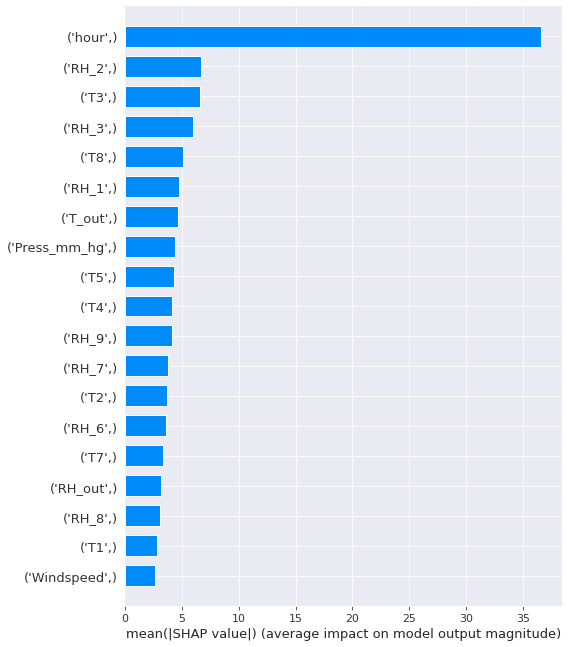

In [118]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values_train, X_train1, plot_type="bar")

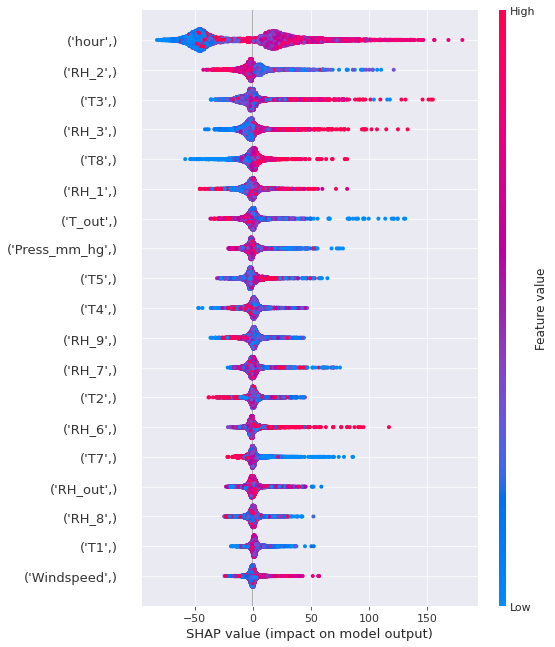

In [119]:
# Obtain a dot Summary Plot
shap.summary_plot(shap_values_train, X_train1, plot_type="dot")

# Conclusion